# PEPCONF - Throughput Troubleshooting

In [1]:
import sys
sys.path.append('../../management/')

In [2]:
import management as mgt
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from qcportal import FractalClient

In [5]:
client = FractalClient()

In [6]:
ds = client.get_collection("OptimizationDataset", "OpenFF PEPCONF OptimizationDataset v1.0")

In [7]:
ds.status('default')

,default
INCOMPLETE,6348
COMPLETE,1167
ERROR,45


In [8]:
ds.df

,default
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712605', status='ERROR')"
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712606', status='COMP..."
CC(=O)N[C@@H](CO)C(=O)N[C@@H](CO)C(N)=O-0,"OptimizationRecord(id='31712607', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712608', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712609', status='COMP..."
...,...
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-8,"OptimizationRecord(id='31729737', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-9,"OptimizationRecord(id='31729738', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-10,"OptimizationRecord(id='31729739', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-11,"OptimizationRecord(id='31729740', status='INCO..."


In [9]:
opts = ds.df.default.tolist()

In [10]:
prov = {opt.id: opt.provenance.dict() for opt in opts if opt.provenance}

In [11]:
df_prov = pd.DataFrame(prov).T
df_prov

,creator,version,routine,username,cpu,hostname,wall_time,qcengine_version
31712606,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,tgokey,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,hpc3-14-07,9155.42,v0.17.0
31712607,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,chodera,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,lu10,9434.58,v0.17.0
31712608,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,chodera,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,ls02,6191.12,v0.17.0
31712609,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,chodera,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,lt18,7273.11,v0.17.0
31712610,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,tgokey,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,hpc3-15-23,6031.03,v0.17.0
...,...,...,...,...,...,...,...,...
31719974,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,chodera,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,ls09,93619,v0.17.0
31720056,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,chodera,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,lt09,58578.2,v0.17.0
31720208,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,qcfractal,Intel(R) Xeon(R) CPU E5-1660 v4 @ 3.20GHz,openff-qca-qm-9956ffc8c-zdprj,168208,v0.17.0
31720452,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,chodera,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,lt14,82920.3,v0.17.0


In [12]:
df_prov.username.value_counts()

chodera      510
tgokey       371
qcfractal    286
Name: username, dtype: int64

In [13]:
df_prov['wall_time_hours'] = df_prov.wall_time.astype(float)/3600

In [14]:
name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}

In [15]:
df_prov['resource'] = df_prov['username'].apply(lambda x: name_map[x])

## Walltime distributions by resource

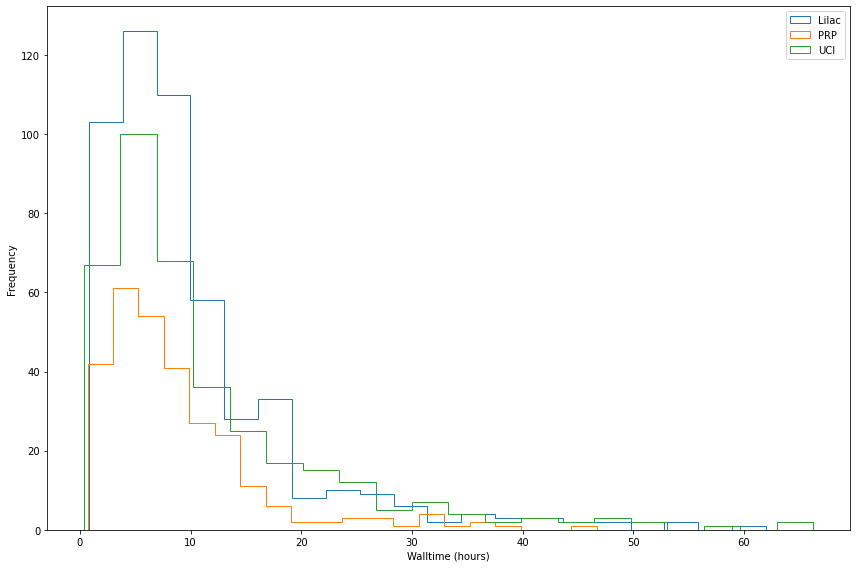

In [16]:
fig, ax = plt.subplots()

(df_prov.groupby('resource').wall_time_hours).plot.hist(bins=20, histtype='step', legend=True, figsize=(12, 8), ax=ax)

ax.set_xlabel("Walltime (hours)")

fig.tight_layout()
fig.savefig('walltime.pdf', dpi=300)

In [17]:
df_prov.wall_time_hours.describe()

count    1167.000000
mean       10.176533
std         9.219880
min         0.353987
25%         4.488458
50%         7.346354
75%        12.467255
max        66.259650
Name: wall_time_hours, dtype: float64

In [18]:
df_prov.wall_time_hours.sum()/24

494.83393539117446

## Measuring Throughput

In [19]:
modified_on = {opt.id: opt.modified_on for opt in opts if opt.provenance}

In [20]:
df_prov['modified_on'] = pd.Series(modified_on)

In [21]:
df_prov.modified_on.describe()

/home/david/.conda/envs/qcsubmit-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                           1167
unique                          1152
top       2020-11-24 02:23:46.559850
freq                               3
first     2020-11-14 21:17:24.092340
last      2020-11-27 15:45:58.561247
Name: modified_on, dtype: object

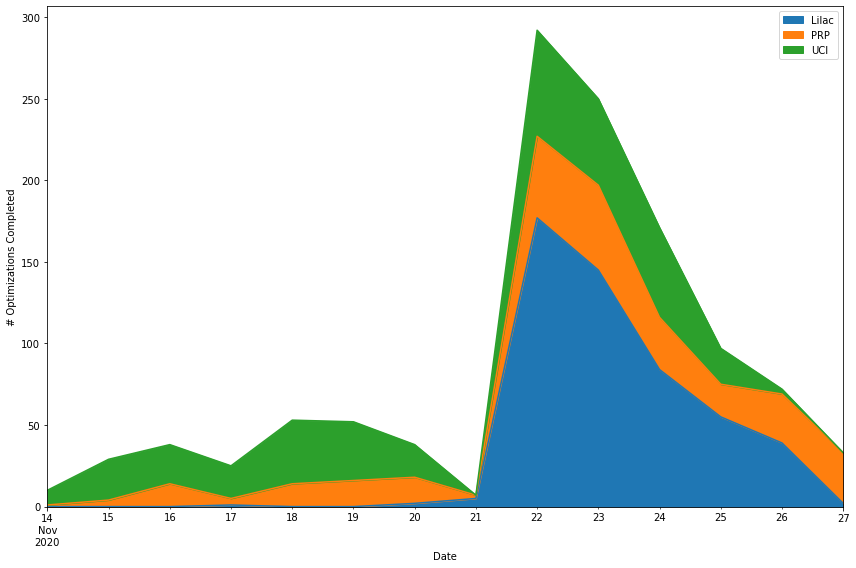

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}
counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts)
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput.pdf', dpi=300)

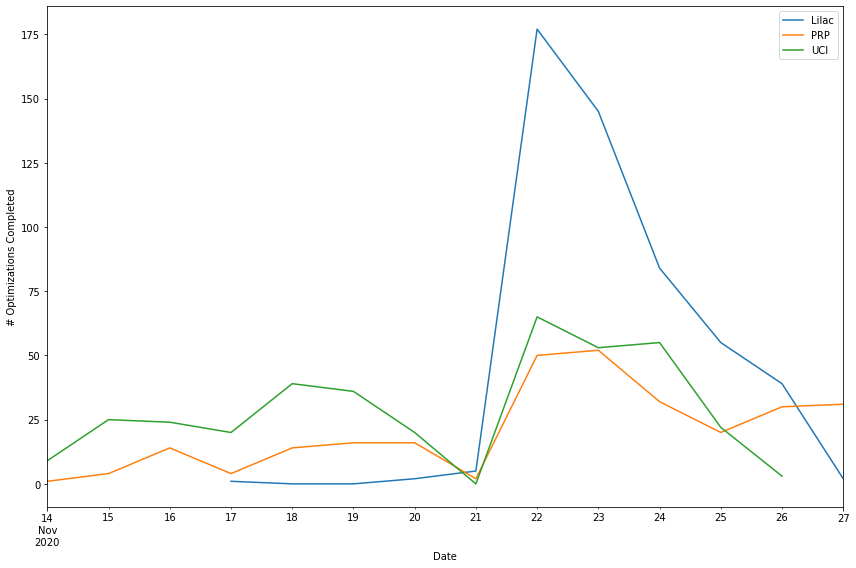

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}
counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts)
counts.plot(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('success-individual.pdf', dpi=300)

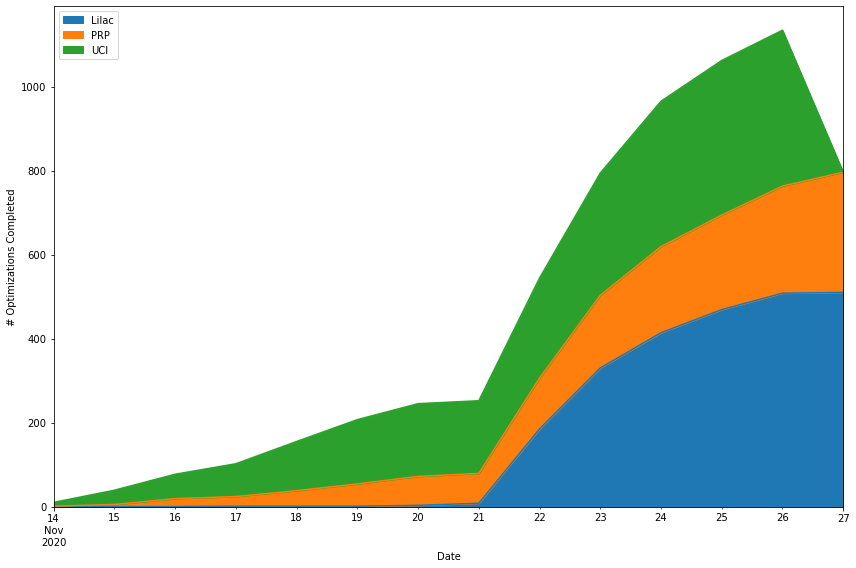

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}
counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts).cumsum()
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput_cumulative.pdf', dpi=300)

## Findings and Recommendations

Findings:
1. Throughput is increasing on this dataset.
2. Trevor's managers are largely responsible for this dataset's advancement.
3. Mean execution time across resources is 13 hours. Can vary upward by up to 60 hours.

Recommendations:
1. Up priority to "high" for this dataset for now. Examine if this increases throughput for each resource.
2. It is not clear why Lilac's contribution is so low. We should review the manager configuration of the QM workers to ensure they aren't being killed by the cluster scheduler. It could also be the case that pre-emption on Lilac is costing us successes.

## Upping priority

In [74]:
from qcportal.models.task_models import PriorityEnum

In [109]:
incomplete = [opt for opt in opts if opt.status != 'COMPLETE']

In [110]:
len(incomplete)

7315